Text(0.5,1,'Sepal * Petal by Length')

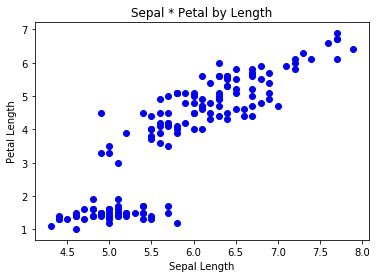

In [5]:
# ex2) nonlinear classifier using decisiontree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

X_original = iris.data

X = X_original[:,0]   # Sepal Length (꽃밭침 길이)
y = X_original[:,2]   # Petal Length (꽃잎 길이)

plt.scatter(X,y,c='b')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal * Petal by Length")

0.75167351365117


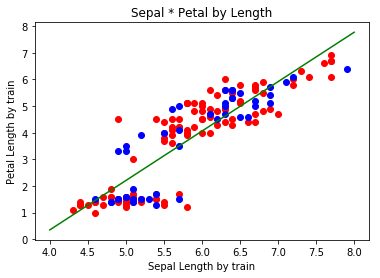

In [76]:
# train test 나누는 펑션
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70%는 training, 30%는 test.

from sklearn.linear_model import LinearRegression
lig = LinearRegression()                # 모델 생성
lig.fit(X_train.reshape(-1,1), y_train) # 모델 학습
#reshape 해야되는 이유 : 머신러닝 하려면 매트릭스 형태여야됨. (하기전엔 옆으로 나열되어 있었음.)

a = lig.intercept_ # y = -6.81 + 1.83*x1
b = lig.coef_

# train 산점도 및 회귀선
plt.xlabel("Sepal Length by train")
plt.ylabel("Petal Length by train")
plt.title("Sepal * Petal by Length")

plt.scatter(X_train, y_train, c='r')
plt.scatter(X_test, y_test, c='b')
xx = np.linspace(4,8,10)
yy = a + b*xx
plt. plot(xx,yy,c='g')

# R-square 구하기
R2 = lig.score(X_test.reshape(-1,1),y_test)
print(R2)

## performance evaluation for classification

In [93]:
# ex2) nonlinear classifier using decisiontree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

X_original = iris.data

X = X_original[:,[0,1]]   # Sepal
y = iris.target
y2 = y.copy()
y2[y2==2]=1

In [101]:
# train / test 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size=0.3, random_state=7)
# 70%는 training, 30%는 test. / random_state를 통해 랜덤 고정

In [104]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)
clf.coef_, clf.intercept_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(array([[ 40.6824147 , -68.24146982]]), array([-9.19251252]))

In [110]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred) # 정확도 97.78%

0.9777777777777777

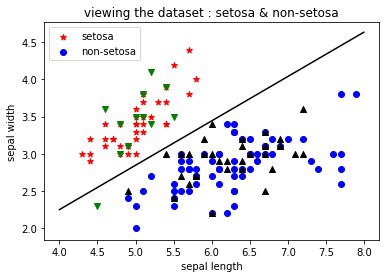

In [139]:
my_marker = ['*','o']
my_colors = ['r','b']

for i in range(2):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,marker=my_marker[i],c=my_colors[i])

my_marker = ['v','^']
my_colors = ['g','k']
    
for i in range(2):
    xs = X_test[:,0][y_test==i]
    ys = X_test[:,1][y_test==i]
    plt.scatter(xs,ys,marker=my_marker[i],c=my_colors[i])

plt.title('viewing the dataset : setosa & non-setosa')
names=['setosa','non-setosa']
plt.legend(names)
plt.xlabel('sepal length') # c.f.) Sepal 꽃밭침, Petal 꽃잎
plt.ylabel('sepal width')

a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_[0]

xx = np.linspace(4,8,100)
yy = -a/b*xx - c/b             # a + b1x1 + b2x2 = 0    -->  x2 = (b1/b2)x1 + (a/b2)

plt.plot(xx,yy,c='k')

In [137]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        12
          1       0.97      1.00      0.99        33

avg / total       0.98      0.98      0.98        45



In [133]:
print(confusion_matrix(y_test,y_pred))

[[11  1]
 [ 0 33]]
